<h1 align='center'> MTA Data Ananysis <h1>

## Data Descriptions:

### 11 Variabels
C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS

- C/A      = Control Area (A002)  
- UNIT     = Remote Unit for a station (R051)  
- SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)  
- STATION  = Represents the station name the device is located at  
- LINENAME = Represents all train lines that can be boarded at this station. Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.  
- DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND     
- DATE     = Represents the date (MM-DD-YY)  
- TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
- DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
- ENTRIES  = The comulative entry register value for a device
- EXIST    = The cumulative exit register value for a device

__Source__: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt


## Table of Contents:

- <a href="#1">1. Introduction</a>
    + <a href="#1.1"> 1.1 List of the Problems</a><br>
    + <a href="#1.2"> 1.2 Libraries & data URLs import</a><br><br>
- <a href="#2">2. Data Analysis</a>    
    + <a href="#2.1"> 2.1 Problem 1</a><br>
    + <a href="#2.2"> 2.2 Problem 2</a><br>
    + <a href="#2.3"> 2.3 Problem 3</a><br>
    + <a href="#2.4"> 2.4 Problem 4</a><br>
    + <a href="#2.5"> 2.5 Problem 5</a><br><br>
- <a href="#3">3. Data Visualization</a>
    + <a href="#3.1"> 3.1 Problem 1</a><br>
    + <a href="#3.2"> 3.2 Problem 2</a><br>
    + <a href="#3.3"> 3.3 Problem 3</a><br>
    + <a href="#3.4"> 3.4 Problem 4</a><br>
    + <a href="#3.5"> 3.5 Problem 5</a><br>

<br>
<br>
<br>

# 1. Introduction <a id='1'></a>


### 1. 1 List of Problems <a id='1.1'></a>
__Data analysis__  
1.Which station has the most number of units as of today?  
2.What is the total number of entries & exits across the subway system for August 1, 2013?  
3.Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date?  
4.What stations have seen the most usage growth/decline in 2013?  
5.What dates in 2013 are the least busy? Could you identify days in 2013 on which stations were not operating at full capacity or closed entirely?  
 
__Visualization__  
1.Plot the daily row counts for data files in Q3 2013.  
2.Plot the daily total number of entries & exits across the system for Q3 2013.  
3.Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.  
4.Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.  
5.Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013.

### 1. 3 Libraries & Data URLs Import <a id='1.3'></a>

In [1]:
# Basic data frame & visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For web crawling
import bs4
import io
import requests

# Time
import datetime as dt

# No warnings
import warnings
warnings.filterwarnings("ignore")

# Data 
# backup = pd.HDFStore("backup.h5") 
# I attached h5 file to retrieve 'df_busy', 'daily_total', 'df_first', 'df_num_sta', 'df_sta.'

%matplotlib notebook

In [2]:
## Get URLs for data
# String to record where to scrap urls
loc='http://web.mta.info/developers/turnstile.html'

# Create page object using requests
page=requests.get(loc).content

# Create soup object
soup=bs4.BeautifulSoup(page,'html.parser')

# Get URLs for data frames
links=soup.find_all('a')
urls=[]
for i in links:
    if str(i.get('href'))[0:4] == "data":
        urls.append("http://web.mta.info/developers/" + str(i.get('href')))
        
urls[:5]

['http://web.mta.info/developers/data/nyct/turnstile/turnstile_181201.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_181124.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_181117.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_181110.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_181103.txt']

### # Findings about the Data
- Each table contains 7 days of turnstile data.
- URLs include the date when the table was registered. This pattern makes it easy to locate URL for the required table.


<br>
<br>
<br>

# 2. Data Analysis <a id='2'></a>

### 2. 1  Which station has the most number of units as of today? <a id='2.1'></a>

In [3]:
# URL for most recent data that contains number of units as of today 
loc_recent = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + "180421" + ".txt"

# Get data frame
s = requests.get(loc_recent).content
df_today = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Get rows for Aug 16 (I wrote this code on April 16)
now = "04/16/2018"
df_today = df_today[df_today['DATE'].str.contains(now)]
df_today.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2018,00:00:00,REGULAR,6582774,2229897
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2018,04:00:00,REGULAR,6582777,2229898


In [4]:
# See which station has the most number of units
print(df_today.groupby("STATION").agg({'UNIT' : lambda x: len(x.unique())}).idxmax())

UNIT    23 ST
dtype: object


__Answer__:  
<br>
23 ST station has the most number of units as of August 13th.

<br>
<br>
<br>

### 2. 2 - What is the total number of entries & exits across the subway system for August 1, 2013? <a id='2.2'></a>

In [5]:
# URL for August 3, 2013 - collected from 'urls' 
loc='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+'130803'+'.txt'

# Get data frame
s=requests.get(loc).content
df2013=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
df2013[0:2]

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,A002,R051,02-00-00,07-27-13,00:00:00,REGULAR,4209603,1443585,07-27-13,04:00:00,...,07-28-13,00:00:00,REGULAR,4210432.0,1443801.0,07-28-13,04:00:00,REGULAR,4210472.0,1443805.0
1,A002,R051,02-00-00,07-28-13,08:00:00,REGULAR,4210490,1443821,07-28-13,12:00:00,...,07-29-13,08:00:00,REGULAR,4211176.0,1444042.0,07-29-13,12:00:00,REGULAR,4211350.0,1444247.0


### # Findings
- Data for 2013 has a different format from that of data for 2018.
- This data frame should be reorganized for further analysis.
- No station names. No headers.

I will reshape and filter the data frame so that pandas\`s groupby/agg/apply function can be applied. 

In [6]:
# Function to reshape the old data frame
def to_long(df_wide, start, end, CA=[]):
    # Set index to keep the columns 'CA, UNIT, SCP'
    if len(CA) == 0: # If you do not want to filter by station
        df_wide = df_wide.set_index([0, 1, 2])
    
    if len(CA)>0: # If you want to filter by station (Used for Visualization Problem 4)
        df_wide = df_wide[df_wide.iloc[:,0].apply(lambda x: x in CA)]
        df_wide = df_wide.set_index([0, 1, 2])
        
    # Loop to reshape the data frame
    df_long = pd.DataFrame()
    
    for i in range(9):
        one_piece = df_wide.loc[:,(5*i+3):(5*i+7)]
        one_piece.columns = range(3, one_piece.shape[1]+3)
        df_long = pd.concat([df_long, one_piece])
    
    # reset the index and name the columns
    df_long.reset_index(inplace=True) 
    headers = "CA,UNIT,SCP,DATETIME,TIME,DESC,ENTRIES,EXITS".split(',')
    df_long.columns = headers
   
    # Drop missing data
    df_long.dropna(subset=["DATETIME"], inplace=True)
    
    # New column for timestamp
    df_long["NEWTIME"] = pd.to_datetime(df_long["DATETIME"] +' '+ df_long["TIME"], infer_datetime_format=True)
    
    # Drop the old time columns
    df_long = df_long.drop(["DATETIME", "TIME"], 1)
    
    # Boolean masks to filter the rows
    mask = (df_long["NEWTIME"] >= start + " 00:00:00") & (df_long["NEWTIME"] <= end + " 00:00:00")
    
    # Filter by the time range then sort by the time
    df_long = df_long[mask].sort_values("NEWTIME")
    
    # Sort the rows according to the time
    df_long = df_long.sort_values(["NEWTIME"])
    
    # Reset the index 
    df_long.reset_index(inplace=True, drop=True)

    return df_long

df = to_long(df2013, "2013-08-01", "2013-08-02") # df_first in the HDF file

# Function to get the total number of exits, entries
def get_total(item):
    return(np.max(item)-np.min(item))

# Get the total counts for entries and exits
ent_exi_num = df.groupby(['CA', 'UNIT', 'SCP']).agg({'ENTRIES' : get_total, 'EXITS' : get_total})
ent_exi_num.apply(sum, axis=0) 
# Note this result is incomplete. I will refine the function and process further.

ENTRIES    10589335.0
EXITS      10099039.0
dtype: float64

### # Findings
- There could be some devices that returned unreasonably high number of entries & exits.   
- For example, the record of device ('N504', 'R021', '02-00-04') was reset during the day causing a serious error in my counting.
- A further analysis is required to check out if there is any device with an unexpected behavior. 

In [7]:
# The total sum of entries & exits for this device below is out of the resonable range.
print(np.argmax(ent_exi_num.apply(sum, axis=1))); print(np.max(ent_exi_num.apply(sum, axis=1)))

('N504', 'R021', '02-00-04')
10874356.0


This number is unresonable.

In [8]:
# Let`s see what happend with the device
df[(df["CA"] == "N504") & (df["SCP"] =='02-00-04')][:10] # See index 17417 - 17422

,CA,UNIT,SCP,DESC,ENTRIES,EXITS,NEWTIME
461,N504,R021,02-00-04,REGULAR,5156751.0,5717501.0,2013-08-01 00:00:00
7161,N504,R021,02-00-04,REGULAR,5156785.0,5717513.0,2013-08-01 04:00:00
10765,N504,R021,02-00-04,REGULAR,5156812.0,5717875.0,2013-08-01 08:00:00
16365,N504,R021,02-00-04,DOOR OPEN,5156921.0,5719060.0,2013-08-01 10:41:44
16366,N504,R021,02-00-04,DOOR OPEN,5156921.0,5719060.0,2013-08-01 10:42:17
16377,N504,R021,02-00-04,LOGON,5156921.0,5719060.0,2013-08-01 10:44:17
16378,N504,R021,02-00-04,DOOR OPEN,5156921.0,5719060.0,2013-08-01 10:44:38
16379,N504,R021,02-00-04,LGF-MAN,5156921.0,5719060.0,2013-08-01 10:44:46
16455,N504,R021,02-00-04,DOOR CLOSE,5156922.0,5719061.0,2013-08-01 10:55:24
16831,N504,R021,02-00-04,DOOR OPEN,5156974.0,5719178.0,2013-08-01 11:42:51


The record of this device was reset during the day causing a serious error in my counting.

In [9]:
# Check if there is any other device that has a similar problem
def suspis_dev(df):
    
    # Return True if there is any decreases in cumulative entry & exit values
    # or unreasonably many entries & exits
    def is_inc(column):
        return (np.diff(column)<0).any() | (np.diff(column)>4000).any()
    
    ent = df.groupby(["CA", "UNIT", "SCP"]).agg({'ENTRIES' : is_inc, 'EXITS' : is_inc})
    # Cumulative values should not decrease over time!
    
    prob_ent = list(ent[ent["ENTRIES"] == True].index.values)
    prob_exi = list(ent[ent["EXITS"] == True].index.values)
    
    prob_total = list(set(prob_ent).union(prob_exi))
    return prob_total
        
# See which devices have strange records
these_ones = suspis_dev(df); these_ones

[('PTH05', 'R543', '00-04-00'),
 ('PTH05', 'R543', '00-01-00'),
 ('N504', 'R021', '02-00-04')]

Those devices should be analyzed in detail.

In [10]:
# See what caused the problem in 'PTH05 R543 00-01-00'
df_ind = df.set_index(["CA","UNIT","SCP"])
df_ind.loc[these_ones[0]]

DESC  ENTRIES   EXITS             NEWTIME
CA    UNIT SCP                                                   
PTH05 R543 00-04-00  REGULAR  44428.0  4406.0 2013-08-01 02:27:31
           00-04-00  REGULAR  44433.0  4406.0 2013-08-01 06:39:31
           00-04-00    LOGON      3.0    17.0 2013-08-01 09:21:42
           00-04-00  REGULAR      3.0    18.0 2013-08-01 10:29:50
           00-04-00  REGULAR  44584.0  4414.0 2013-08-01 10:51:31
           00-04-00  REGULAR  44623.0  4420.0 2013-08-01 15:03:31
           00-04-00  REGULAR  44760.0  4431.0 2013-08-01 19:15:31
           00-04-00  REGULAR  44766.0  4435.0 2013-08-01 23:27:31

There are some records with strange values

In [11]:
#'PTH05 R543 00-04-00'
df_ind.loc[these_ones[2]]

DESC    ENTRIES      EXITS             NEWTIME
CA   UNIT SCP                                                           
N504 R021 02-00-04     REGULAR  5156751.0  5717501.0 2013-08-01 00:00:00
          02-00-04     REGULAR  5156785.0  5717513.0 2013-08-01 04:00:00
          02-00-04     REGULAR  5156812.0  5717875.0 2013-08-01 08:00:00
          02-00-04   DOOR OPEN  5156921.0  5719060.0 2013-08-01 10:41:44
          02-00-04   DOOR OPEN  5156921.0  5719060.0 2013-08-01 10:42:17
          02-00-04       LOGON  5156921.0  5719060.0 2013-08-01 10:44:17
          02-00-04   DOOR OPEN  5156921.0  5719060.0 2013-08-01 10:44:38
          02-00-04     LGF-MAN  5156921.0  5719060.0 2013-08-01 10:44:46
          02-00-04  DOOR CLOSE  5156922.0  5719061.0 2013-08-01 10:55:24
          02-00-04   DOOR OPEN  5156974.0  5719178.0 2013-08-01 11:42:51
          02-00-04  DOOR CLOSE     1795.0        1.0 2013-08-01 11:52:20
          02-00-04   DOOR OPEN     1795.0        1.0 2013-08-01 11:52:27
          02-00-04     REGULAR     1801.0       21.0 2013-08-01 12:00:00
          02-00-04     REGULAR     2325.0      449.0 2013-08-01 16:00:00
          02-00-04     REGULAR     3761.0      756.0 2013-08-01 20:00:00
          02-00-04     REGULAR     4075.0      852.0 2013-08-02 00:00:00

 ### # Comments
 - Those three devices had temporary errors with their register values.
 - I will compute their entry and exit values considering the error pattern. 

In [12]:
# Correct errorneous value for device
def cort_malfun_dev(df):
    
    these_ones = suspis_dev(df)
    ent_exi_num = df.groupby(['CA', 'UNIT', 'SCP']).agg({'ENTRIES' : get_total, 'EXITS' : get_total})
    df_ind = df.set_index(['CA', 'UNIT', 'SCP'])
    
    for i in range(len(these_ones)):
        exit = np.diff(df_ind.loc[these_ones[i]]['EXITS'])
        mask = (exit > 0) & (exit < 4000) # This bar, 4000, is still arbitrary. If I had more time, I would build
        cort_exit = sum(exit[mask])       # confidence intervals to determine acceptable ranges for each device.
                                          
        entri = np.diff(df_ind.loc[these_ones[i]]['ENTRIES'])
        mask = (entri > 0) & (entri < 4000)
        cort_entri= sum(entri[mask])
        
        ent_exi_num.loc[these_ones[i]] = [cort_entri, cort_exit]
    
    return ent_exi_num



# Total values!
cort_malfun_dev(df).apply(sum, axis=0)

ENTRIES    5392179.0
EXITS      4247693.0
dtype: float64

__Answer__:  
<br>Total number of __entries: 5,392,179__<br> Total number of __exits: 4,247,693__<br>(Approximation)

<br>
<br>
<br>

<a id='2.3'></a>
### 2. 3 - Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date? 

__First, I will identify the busiest turnstile device.__

In [13]:
# Which turnstile device is the busiest?
ent_exi_sum = cort_malfun_dev(df).apply(sum, axis=1)
print(np.argmax(ent_exi_sum)); print(np.max(ent_exi_sum))

('N063A', 'R011', '00-00-00')
11845.0


__Answer__: The busiest turnstile device was 'N063A, R011, 00-00-00.'
<br>
<br>
<br>
__Second, I will identify the busiest station.__

In [14]:
# Which station was the busiest?
ent_exi_sum
# There are no station names in the old form

CA     UNIT  SCP     
A002   R051  02-00-00    2094.0
             02-00-01    1551.0
             02-03-00    2808.0
             02-03-01    3732.0
             02-03-02    3449.0
             02-03-03    2891.0
             02-03-04    2338.0
             02-03-05    2658.0
             02-03-06    2160.0
             02-05-00       0.0
             02-05-01       0.0
             02-06-00    2269.0
A006   R079  00-00-00    5573.0
             00-00-01    3206.0
             00-00-02    2233.0
             00-00-03    1686.0
             00-00-04    1730.0
             00-03-00    2081.0
             00-03-01    3099.0
             00-03-02    4558.0
A007   R079  01-05-00       0.0
             01-05-01       0.0
             01-06-00    2033.0
             01-06-01    2522.0
             01-06-02    1364.0
             01-06-03    1454.0
A010   R080  00-00-00    3776.0
             00-00-01    2452.0
             00-00-02    1855.0
             00-00-03    1464.0
                  

### # Findings
+ The old form of the turnstile data does not include the station name of each C/A.
+ I will make a dictionary of which keys are the name of C/As and values are the name of according stations. Each C/A belongs to a single station.
+ The dataset closest to August 1, 2013 which was registered in the new form is January 03, 2015.
+ Each C/A corresponds to a single station. However, units or SCPs correspond to one or more stations. I will use C/A to assign each device to a station.

In [15]:
# Get the data frame for January 03, 2015
loc = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + "150103" + ".txt"
s = requests.get(loc).content
df_closest = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Check out if each C/A has a unique station
print((df_closest.groupby("C/A").agg({"STATION" : lambda x: len(x.unique())})!=1).any()) #True; unique

# See that UNIT and SCP have one or more stations (can`t be used as an ID to identify a station)
print((df_closest.groupby("UNIT").agg({"STATION" : lambda x: len(x.unique())})!=1).any()) # False
print((df_closest.groupby("SCP").agg({"STATION" : lambda x: len(x.unique())})!=1).any()) # False

STATION    False
dtype: bool
STATION    True
dtype: bool
STATION    True
dtype: bool


In [16]:
# Get the dictionary matching C/A with station
df_closest = df_closest.set_index('C/A')

matching = {}
for CA in df_closest.index.unique():
    matching[CA] = df_closest.loc[CA, "STATION"].iloc[0]

# This `matching` dictionary contains paris of a C/A and a corresponding station.


<br>
I will assign the total number of entries & exits to each station. Note that there were some C/As that existed on August 1, 2013, but disappeared before January 03, 2015. I will assign them to "Unknown" category.
<br>
<br>

In [18]:
# Function to get total entry & exit counts for each station
def which_sta(df, warning=False):
    
    val_each_CA = cort_malfun_dev(df).reset_index(["UNIT", "SCP"])
    
    # Dictionary to store counts for each station
    station_count = {}

    # Loop to classify each count
    for ind in val_each_CA.index.unique():
        # If the name of C/A can be assigned to a station
        if ind in matching.keys(): 
            station = matching[ind]
            station_count[station] = station_count.get(station, 0) +\
                                        val_each_CA.loc[ind, ["ENTRIES", "EXITS"]].sum().sum()
    
        # If the name of C/A cannot be identified, print a warning (C/A removed before 20150103 or with a name changed)
        else:
            if warning:
                print("There was an unidentified device")

    return station_count

val_each_sta = which_sta(df) #This is a dictionary

In [19]:
# Get the station with the greatest number of entries & exits
max_value = max(val_each_sta.values()) 
[str(key)+": "+str(value) for key, value in val_each_sta.items() if value == max_value]

['34 ST-PENN STA: 326744.0']


__Answer__:  
<br>
The busiest station was the '34 ST-PENN STA' station. 


<br>
<br>
<br>

### 2. 4 - What stations have seen the most usage growth/decline in 2013? <a id='2.4'></a>

I will pick three days in January and December. I will use their medians to calculate the year\`s usage growth/decline.  
I did not call around 01/01 or 12/31 because these days are holidays. They must have an unusual usage pattern.

In [305]:
# Tables registered on Jan. 12, 2013, and on Dec. 21th, 2014.
loc_fst = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+'130119'+'.txt'
loc_lst = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+'131221'+'.txt'

# Get data frame
s_fst = requests.get(loc_fst).content
s_lst = requests.get(loc_lst).content

df_fst = pd.read_csv(io.StringIO(s_fst.decode('utf-8')), header=None)
df_lst = pd.read_csv(io.StringIO(s_lst.decode('utf-8')), header=None)

# Data for a few days in the middle of January 2013
df_fst1 = to_long(df_fst, "2013-01-13", "2013-01-14")
df_fst2 = to_long(df_fst, "2013-01-15", "2013-01-16")
df_fst3 = to_long(df_fst, "2013-01-17", "2013-01-18")

# Data for a few days in the middle of December 2013
df_lst1 = to_long(df_lst, "2013-12-15", "2013-12-16")
df_lst2 = to_long(df_lst, "2013-12-17", "2013-12-18")
df_lst3 = to_long(df_lst, "2013-12-19", "2013-12-20")

# Get the total number of entries & exits 
df_fst_sta1 = pd.Series(which_sta(df_fst1))
df_fst_sta2 = pd.Series(which_sta(df_fst2))
df_fst_sta3 = pd.Series(which_sta(df_fst3))

# Get the total number of entries & exits 
df_lst_sta1 = pd.Series(which_sta(df_lst1))
df_lst_sta2 = pd.Series(which_sta(df_lst2))
df_lst_sta3 = pd.Series(which_sta(df_lst3))

# Build data frames with total usage for each station. (Columns are the station names)
df_start = pd.DataFrame([df_fst_sta1, df_fst_sta2, df_fst_sta3])
df_end = pd.DataFrame([df_lst_sta1, df_lst_sta2, df_lst_sta3])

# Get median for each station
df_med_start = pd.DataFrame.median(df_start, axis=0)
df_med_end = pd.DataFrame.median(df_end, axis=0)

# Get the usage growth/decline in 2013 for each station
usage_diff = df_med_end - df_med_start

# Which station has the most growth in 2013?
print(np.argmax(usage_diff)); print(np.max(usage_diff))

# Which station has the most decline in 2013?
print(np.argmin(usage_diff)); print(np.min(usage_diff))

57 ST-7 AV
41440.0
JOURNAL SQUARE
-20789.0


__Answers__:  
<br>
'57 ST-7 AV' station has the most usage growth  
'JOURNAL SQUARE' station has the most usage decline

<br>
<br>
<br>

 <a id='2.5'></a>
### 2. 5 - What dates in 2013 are the least busy? Could you identify days in 2013 on which stations were not operating at full capacity or closed entirely?

__First, I will identify the least busy date in 2013.__

In [13]:
def get_daily_total(start='20130105', end='20140104', row_count=False):
    # Get the dates of the year when the tables were recorded 
    at = [d.strftime('%y%m%d') for d in pd.date_range(start, end, freq='W-SAT')]

    # Import data frame
    df = pd.DataFrame()
    for i in range(len(at)):    
    
        # URL to import the table; I use 'try' to avoid some data points with structural error.
        try:
            loc = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + at[i] + ".txt"
            s = requests.get(loc).content
            df_new = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
        
            # Find which days
            date = []
            for d in range(8):
                date.append((dt.datetime.strptime(at[i], '%y%m%d').date() - dt.timedelta(days=7-d)).strftime("%y%m%d"))
   
            # If row_count = False, this function calculates the total counts of exit & entries            
            if row_count == False:
                
                # List of which elements 
                df_seven_days = []               
                for ind in range(len(date)-1):
                    start = str(pd.to_datetime(date[ind], format="%y%m%d").date())
                    end = str(pd.to_datetime(date[ind+1], format="%y%m%d").date())
                    df_day = to_long(df_new, start, end)
                    df_seven_days.append(df_day)
                
                # Get a dictionary. key: which date, value: how many entries & exits
                total_usage = {}
                for ind in range(len(df_seven_days)):
                    total_usage[date[ind]] = cort_malfun_dev(df_seven_days[ind]).sum().sum()
        
                # Get a data frame. index: date, value: total usage 
                df = pd.concat([df, pd.Series(total_usage)])
            
            # If true, this function returns the total row counts of each day
            if row_count == True:
                
                # List of which elements
                df_seven_days = []
                for ind in range(len(date)-1):
                    start = str(pd.to_datetime(date[ind], format="%y%m%d").date())
                    end = str(pd.to_datetime(date[ind+1], format="%y%m%d").date())
                    df_day = to_long(df_new, start, end)
                    df_seven_days.append(df_day.shape[0])
                    
                    
                # Get a dictionary. key: which date, value: how many rows
                total_row = {}
                for ind in range(len(df_seven_days)):
                    total_row[date[ind]] = df_seven_days[ind]
        
                # Get a data frame. index: date, value: total usage 
                df = pd.concat([df, pd.Series(total_row)])
                
        except:
            pass
        
    return df


df_busy = get_daily_total()[3:-3]
print(np.argmin(df_busy[0]));print(np.min(df_busy[0]))

<IPython.core.display.Javascript object>


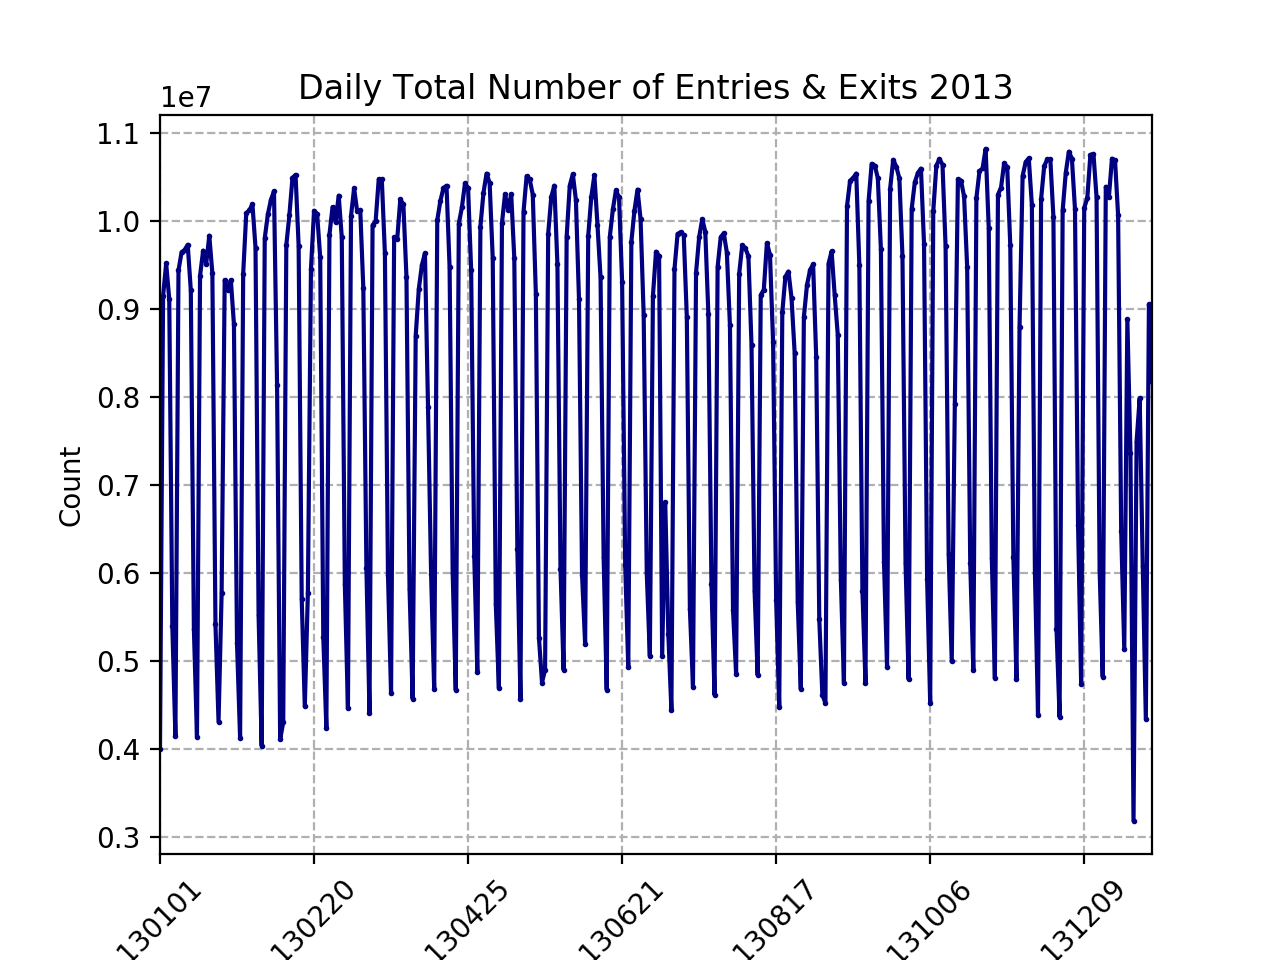

In [391]:
# See the plot to understand the seasonal pattern
ax = df_busy.plot(title="Daily Total Number of Entries & Exits 2013", 
                           marker='.', markersize=2, legend=False, colormap='jet', rot=45)
ax.set_xlabel("Date")
ax.set_ylabel("Count")
plt.grid(b=True, linestyle='--')

__Answer__: <br>
<br>
'2013/12/25' is the least busy day in 2013

### # Findings

According to the graph, this time series data has a clear seasonal pattern (s = 7) with no obvious trend. A detailed detection indicates that people use the subway less on weekends causing this weekly seasonality. This is also often due to track constructions, station maintenance, or less trains working on weekends. Lastly, as I guessed when estimating the year\`s usage growth/decrease, the first and the last month have unusual pattern with much lower people using the subway. People leave NY to stay with their family during Chrismas or New Year\`s day.  This justifies the need to have many data points for January and December to compare the medians in problem 4.

<br>
<br>
<br>

__Second, I will figure out the days in 2013 on which stations were not operating at full capacity or closed entirely.__

<IPython.core.display.Javascript object>


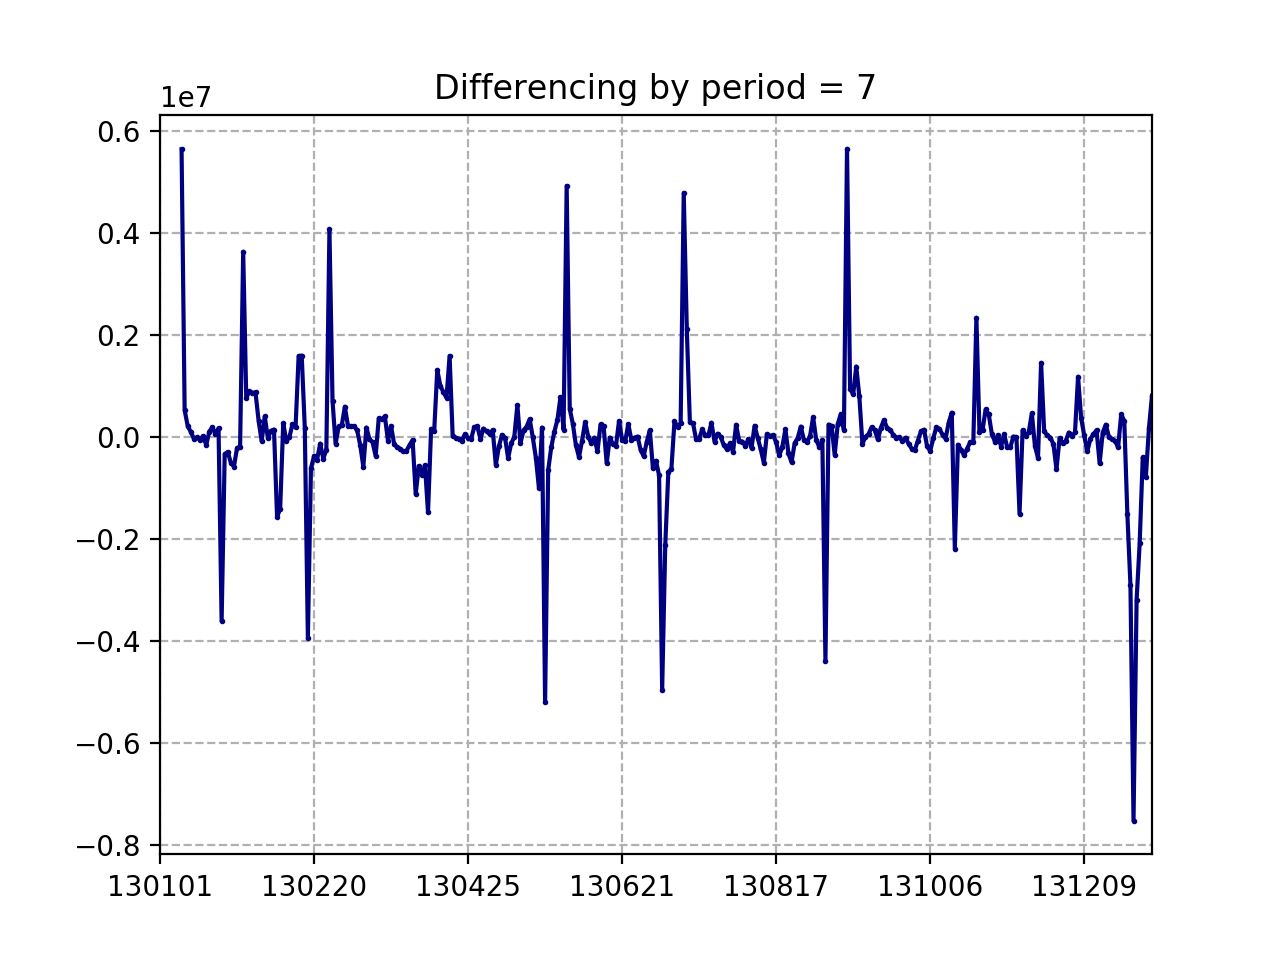

In [389]:
# Let`s remove the seasonality by differencing
df_busy.diff(7).plot(title="Differencing by period = 7", 
                           marker='.', markersize=2, legend=False, colormap='jet')

# Visualize it
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_xticklabels(df_busy.index, rotation=45)
plt.grid(b=True, linestyle='--')

The time series graph after differencing with period 7 helps to identify outliers along the year. To make my analysis more robust, I will leave out the first two weeks in January and the last two weeks in December. Those periods have patterns that are not aligned with other months due to holidays and New Year\`s day.

In [89]:
df_busy_diff = pd.DataFrame(df_busy.diff(7)[14:-14]) # I leave out the first and last two weeks on purpose.
df_busy_diff[(df_busy_diff - df_busy_diff.mean()) < -3*df_busy_diff.std()].dropna().index

Index(['130121', '130218', '130527', '130704', '130902'], dtype='object')

'2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02' should be considered as the days when some stations were closed or not fully operating.  
<br>
Plus, I have very similar results using another way.

In [403]:
# To identify outliers, the time series data`s seasonality should be considered.
# Sundays` data
sun = {}
for i in range(int(df_busy.shape[0]/7)):
    sun[df_busy.index[i*7+5]] = int(df_busy.iloc[i*7+5])
df_sun = pd.Series(sun)

# Saturdays` data
sat = {}
for i in range(int(df_busy.shape[0]/7)):
    sat[df_busy.index[i*7+4]] = int(df_busy.iloc[i*7+4])
df_sat = pd.Series(sat)

# Weekdays` data
weekday = {}
for i in range(int(df_busy.shape[0]/7)):
    weekday[df_busy.index[i*7-1]] = int(df_busy.iloc[i*7-1])
    weekday[df_busy.index[i*7]] = int(df_busy.iloc[i*7])
    weekday[df_busy.index[i*7+1]] = int(df_busy.iloc[i*7+1])
    weekday[df_busy.index[i*7+2]] = int(df_busy.iloc[i*7+2])
    weekday[df_busy.index[i*7+3]] = int(df_busy.iloc[i*7+3])
df_weekday = pd.Series(weekday)

# Show those far from mean
print(df_sun[(df_sun - df_sun.mean()) < -2*df_sun.std()])
print(df_sat[(df_sat - df_sat.mean()) < -2*df_sat.std()])
print(df_weekday[(df_weekday - df_weekday.mean()) < -2*df_weekday.std()])

130203    4038729
dtype: int64
130209    4110413
dtype: int64
130101    4007198
130121    5770315
130218    5777307
130527    4901591
130704    5058944
130705    6803723
130902    4521693
131224    7367707
131225    3186451
dtype: int64


__Answers__:
<br>
<br>
Those days except Christmas above should be considered as when stations were not fully operating or closed entirely.

<br>
<br>
<br>

# 3. Data Visualization <a id='3'></a>

### 3. 1 - Plot the daily row counts for data files in Q3 2013. <a id='3.1'></a>

<IPython.core.display.Javascript object>


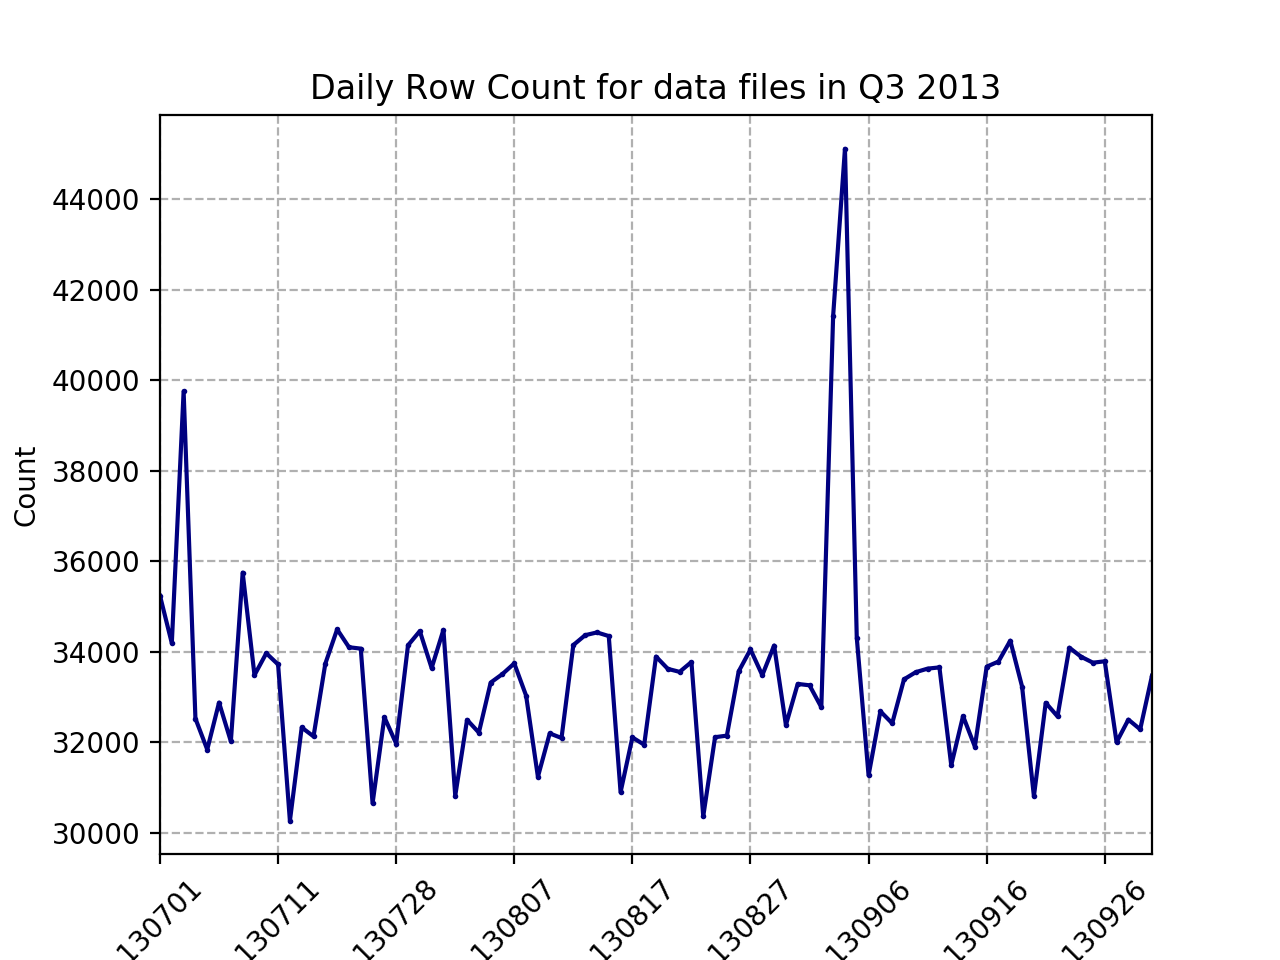

In [390]:
# Use 'get_daily_total' function with row_count=True parameter 
#daily_total = get_daily_total(start="20130706", end="20131005", row_count=True)[2:-4]

# Visualize it
ax = daily_total.plot(title="Daily Row Count for data files in Q3 2013", 
                             marker='.', markersize=2, legend=False, colormap='jet', rot=45)
ax.set_xlabel("Date")
ax.set_ylabel("Count")
plt.grid(b=True, linestyle='--')

<br>
<br>
<br>

### 3. 2 - Plot the daily total number of entries & exits across the system for Q3 2013. <a id='3.2'></a>

<IPython.core.display.Javascript object>


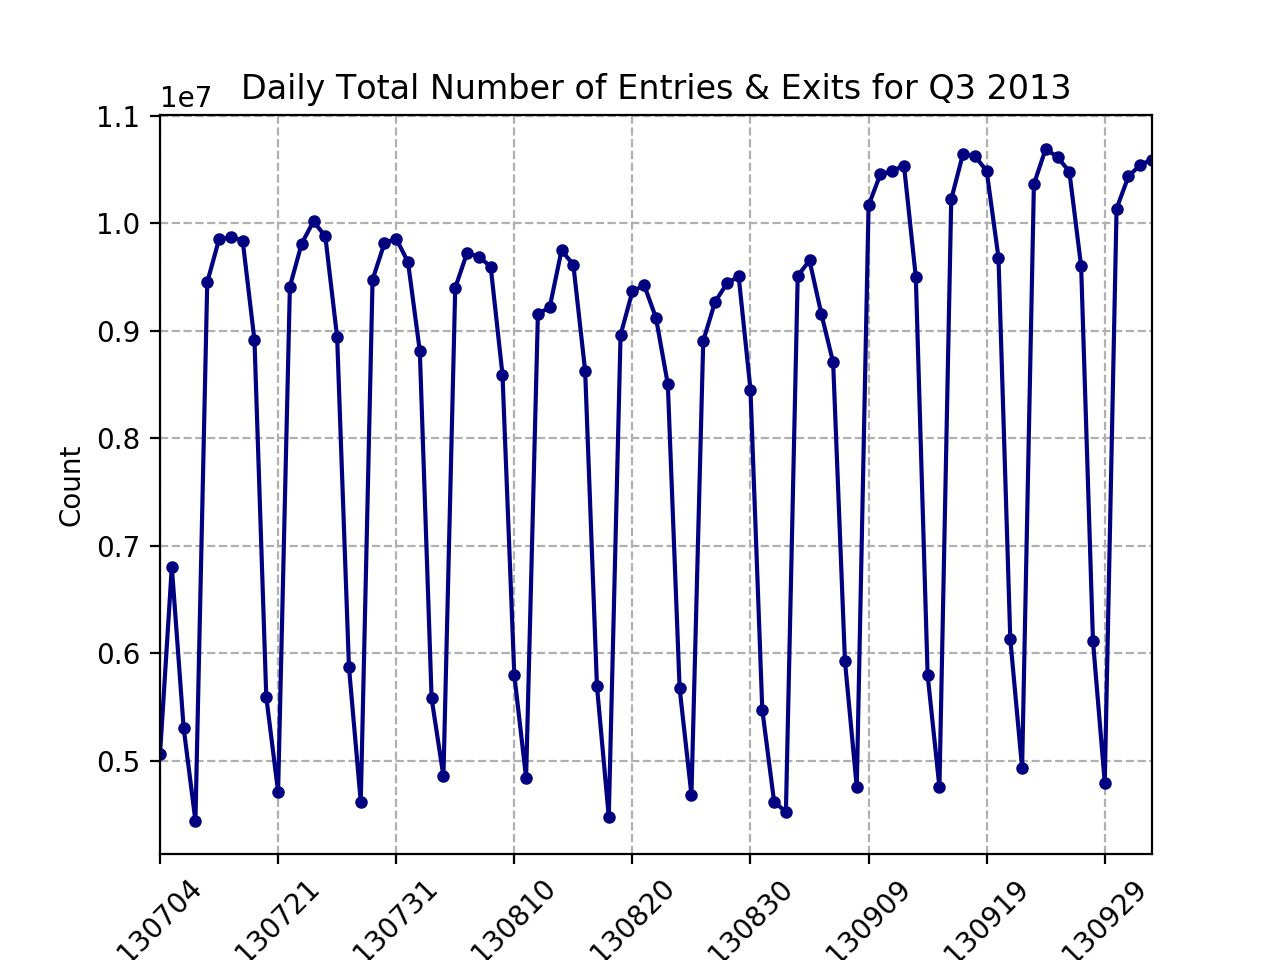

In [392]:
# Visualize a part of df_busy that we already generated in problem 2.5
ax = df_busy[163:248].plot(title="Daily Total Number of Entries & Exits for Q3 2013", 
                           marker='.', markersize=7, legend=False, colormap='jet', rot=45)
ax.set_xlabel("Date")
ax.set_ylabel("Count")
plt.grid(b=True, linestyle='--')

<br>
<br>
<br>

<a id='3.3'></a>
### 3. 3 - Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA. 

In [358]:
# Function to return daily usages of penn station.
def penn_count(timepoint=[d.strftime('%y%m%d') for d in pd.date_range("20130706", end="20131005", freq='W-SAT')]):
    
    # Return how many people used penn station on the single day input.
    def penn_sta(df_penn):
        count = cort_malfun_dev(df_penn).sum().sum()
        return count
    
    # From 'matching' dictionary, get the list of C/As that belong to Penn station.
    these_ca =[]
    for CA, station in matching.items():   
        if station == '34 ST-PENN STA':
            these_ca.append(CA)
            
    # This dictionary store the daily numbers
    date_count = {}
    for i in range(len(timepoint)):    

        try:
            loc = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + timepoint[i] + ".txt"
            s = requests.get(loc).content
            df_new = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
            
            # Find which days
            date = []
            for d in range(8):
                date.append((dt.datetime.strptime(timepoint[i], '%y%m%d').date() - dt.timedelta(days=7-d)).strftime("%y%m%d"))
                           
            for ind in range(len(date)-1):
                start = str(pd.to_datetime(date[ind], format="%y%m%d").date())
                end = str(pd.to_datetime(date[ind+1], format="%y%m%d").date())
                df_day = to_long(df_new, start, end, CA=these_ca)
                date_count[date[ind]] = penn_sta(df_day)
            
        except:
            pass
        
    return date_count

count = penn_count()
df_count = pd.Series(count)[2:-2]

# Time index
time = []
for i in range(len(df_count.index)):
    date = dt.datetime.strptime(df_count.index[i], '%y%m%d').date()
    time.append(str(date))

# Seperate the data frame for each month
df_count.index = time
df_fir_mon = df_count[(df_count.index>="2013-07-01") & (df_count.index<="2013-07-31")]
df_sec_mon = df_count[(df_count.index>="2013-08-01") & (df_count.index<="2013-08-31")]
df_thr_mon = df_count[(df_count.index>="2013-09-01") & (df_count.index<="2013-09-31")]

<IPython.core.display.Javascript object>


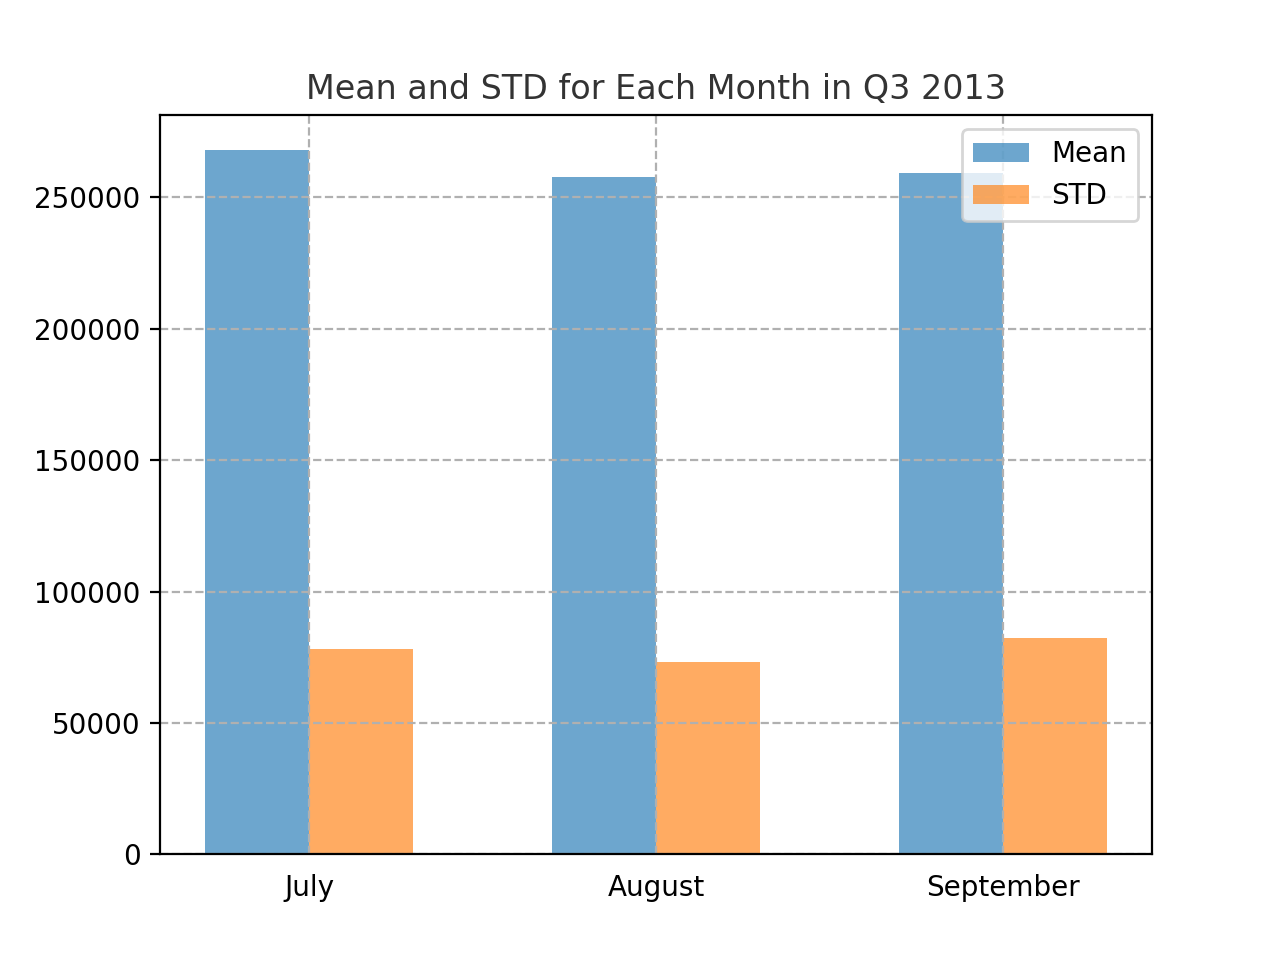

In [388]:
plt.figure()

# Get means and SDs for each of the months
mean = [df_fir_mon.mean(), df_sec_mon.mean(), df_thr_mon.mean()]
std = [df_fir_mon.std(), df_sec_mon.std(), df_thr_mon.std()]
xval_mean = np.arange(0,3)
xval_std = xval_mean+0.3

# Bring the plot
plt.bar(xval_mean, mean, width = 0.3, alpha=0.65, label="Mean", align='center')
plt.bar(xval_std, std, width=0.3, alpha=0.65, label="STD", align='center')
plt.xticks((xval_mean + xval_std)/2, ["July","August","September"])
plt.title('Mean and STD for Each Month in Q3 2013', alpha=0.8)
plt.legend()
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')
plt.grid(b=True, linestyle='--')

<a id='3.4'></a>
### 3. 4 - Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA. 

<IPython.core.display.Javascript object>


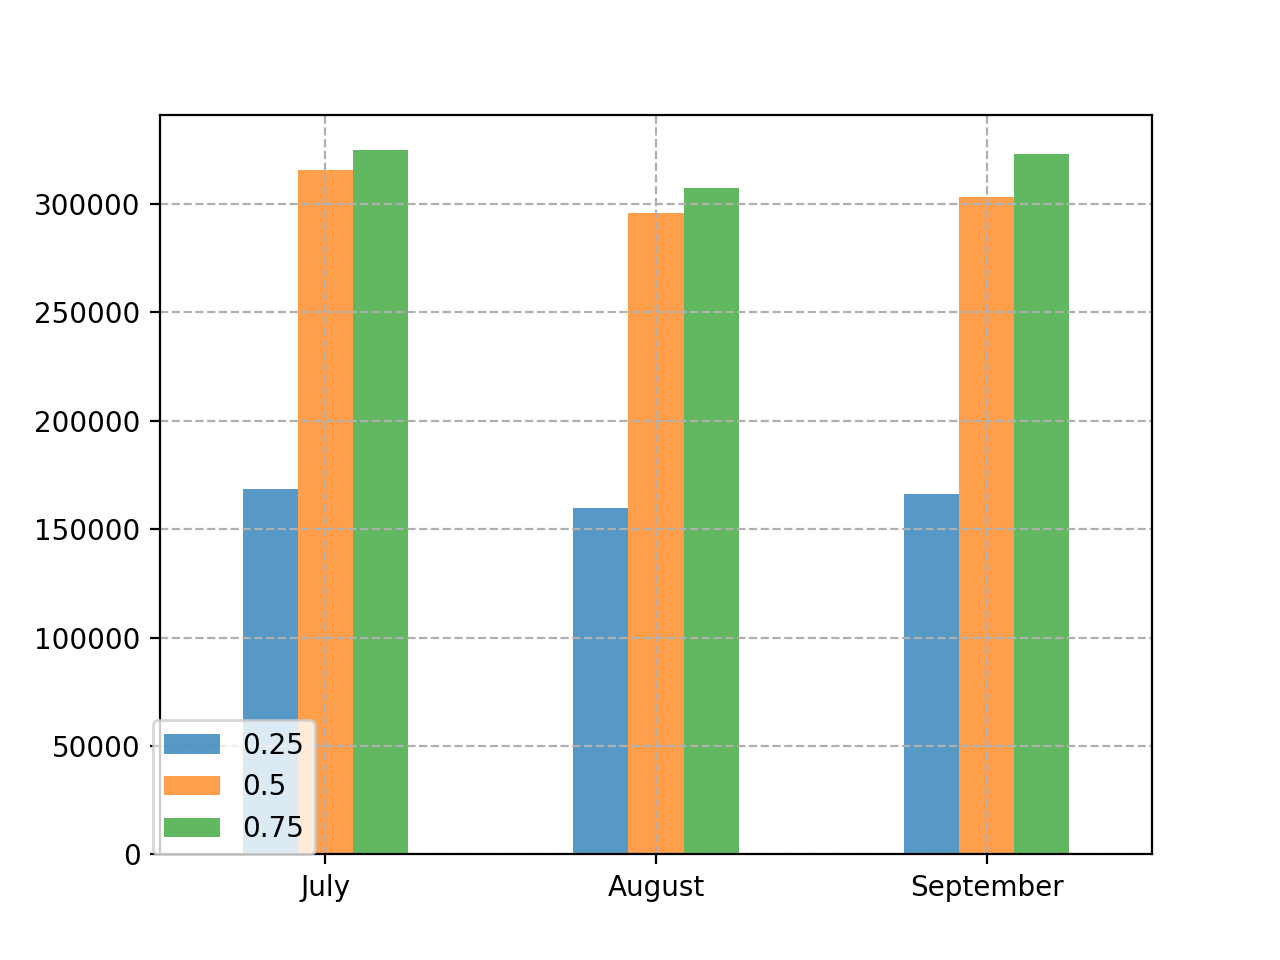

In [386]:
months = [df_fir_mon, df_sec_mon, df_thr_mon]

# Get each month`s quantiles
per =[]
for i in range(len(months)):
    per.append(months[i].quantile([0.25, 0.5,0.75]))

# Make a data frame
quants = pd.DataFrame(per)
quants.index = ["July", "August", "September"]

# Bring the plot
quants.plot(kind='bar',alpha=0.75, rot=0, linestyle='-')
plt.legend(loc='left', bbox_to_anchor=(0.17, 0.2))
plt.grid(b=True, linestyle='--')

<a id='3.5'></a>
### 3. 5 - Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013. 

In [308]:
# Function to return each station`s daily usage over a time period
def get_per_station(start="20130629", end="20131005"):
    
    # Time period
    at = [d.strftime('%y%m%d') for d in pd.date_range(start, end, freq='W-SAT')]
    
    # To index the output data frame
    time_index=[]

    df = pd.DataFrame(columns=set(matching.values()))
    for i in range(len(at)):    
    
  
        try:
            loc = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + at[i] + ".txt"
            s = requests.get(loc).content
            df_new = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
        
            # Find which days
            date = []
            for d in range(8):
                date.append((dt.datetime.strptime(at[i], '%y%m%d').date() - dt.timedelta(days=7-d)).strftime("%y%m%d"))

            # General process is the same as above. This time 'which_sta()' used.            
            for ind in range(len(date)-1):
                time_index.append(date[ind])
                start = str(pd.to_datetime(date[ind], format="%y%m%d").date())
                end = str(pd.to_datetime(date[ind+1], format="%y%m%d").date())
                df_day = to_long(df_new, start, end)
                sta_series = pd.Series(which_sta(df_day))
                df = df.append(sta_series, ignore_index=True)
            
        except:
            pass
    df.index = time_index
    return df

df_sta = get_per_station()

# Differencing with period 7
df_sta_diff = df_sta.diff(7)

# Find outliers
num_sta = ((df_sta_diff - df_sta_diff.mean()) < -3* df_sta_diff.std()).sum(axis = 1)

# Make a data frame to visualize
df_num_sta = pd.DataFrame(num_sta[9:-4])

There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was 

There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device
There was an unidentified device


<IPython.core.display.Javascript object>


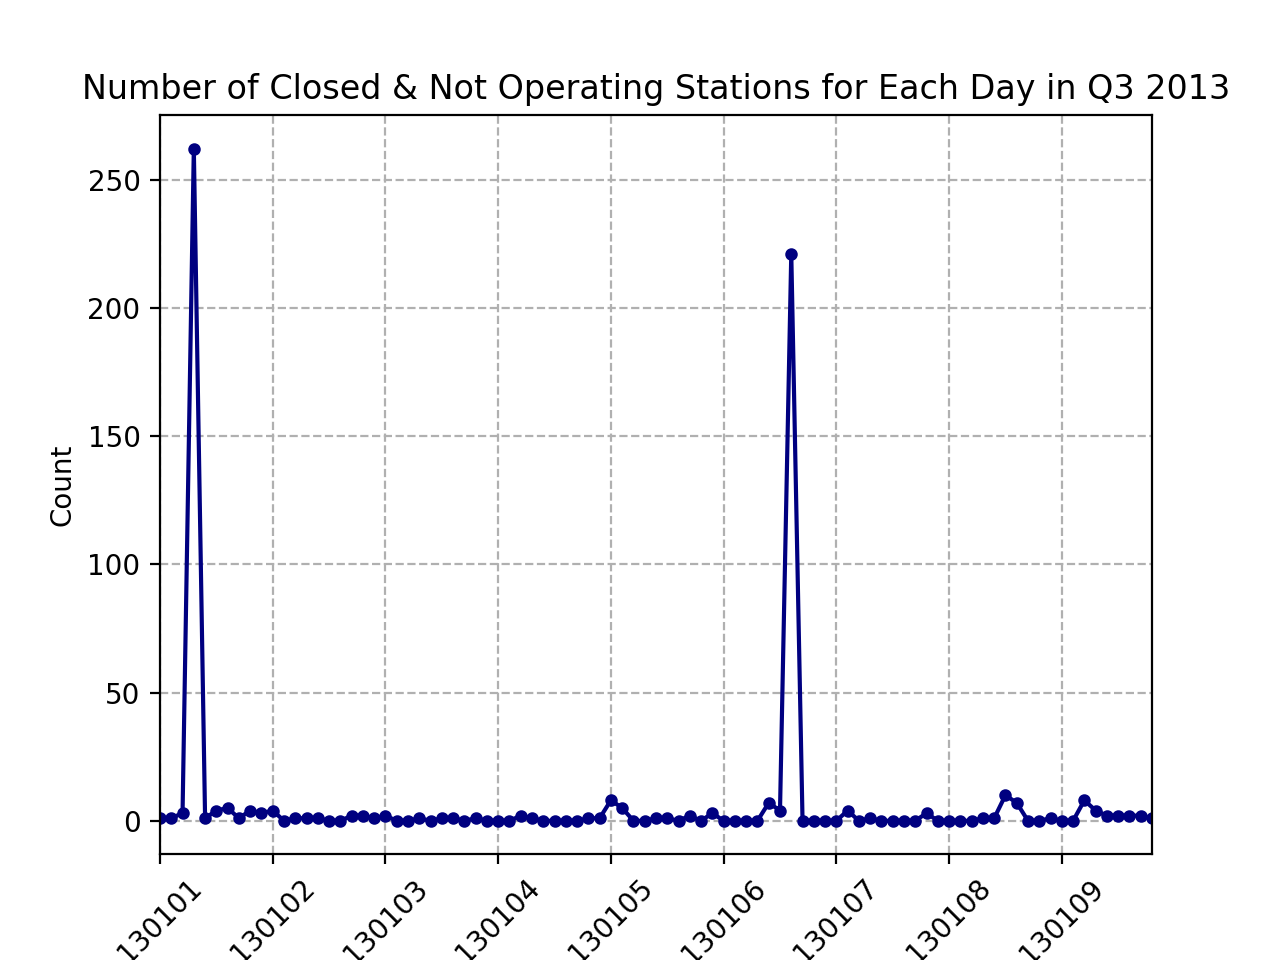

In [387]:
# Bring the plot
ax = df_num_sta.plot(title="Number of Closed & Not Operating Stations for Each Day in Q3 2013", 
                           marker='.', markersize=7, legend=False, colormap='jet', rot=45)
ax.set_xlabel("Date")
ax.set_ylabel("Count")
plt.grid(b=True, linestyle='--')